In [1]:
'''Import section'''

from __future__ import print_function
from __future__ import absolute_import


import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import pandas as pd


In [2]:
#Later used for labeling tree data output. 

openfish = pd.read_csv('openfish.txt_results.csv')
openfish2 = pd.read_csv('openfish03112018.txt_results.csv')
openfish3 = pd.read_csv('openfish3.txt_results.csv')
phishtank = pd.read_csv('phishtank_urls.txt_results.csv')
alexa = pd.read_csv('top_sites.txt_results.csv')



# alexa = alexa.drop([0])
# frames = [openfish, alexa, openfish2, openfish3, phishtank]
# merged = pd.concat(frames)
# merged.to_csv("output.csv", index=False)


# merged.head()
# merged.info()

EmptyDataError: No columns to parse from file

In [3]:
training_data = np.genfromtxt('output.csv',delimiter=',',dtype=np.int32)

print(len(merged.columns))


NameError: name 'merged' is not defined

In [5]:
#Split data into x(features) and y(label)
inputs = training_data[:,:-1]
outputs = training_data[:,-1]


#split data by 20%
x_train ,x_test,y_train, y_test = train_test_split(inputs,outputs,test_size=0.25)       #test_size=0.2(whole_data)

print(len(x_test))
print(len(x_train))

534
1602


In [6]:
lgr_test = LogisticRegression()

lgr_test.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
predictions = lgr_test.predict(x_test)

accuracy = 100.0 * accuracy_score(y_test, predictions)

print ("The accuracy of your Logistic Regression on testing data is: " + str(accuracy))



The accuracy of your Logistic Regression on testing data is: 93.44569288389512


In [8]:
tree_test = tree.DecisionTreeClassifier()

tree_test.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [9]:
tree_prediction = tree_test.predict(x_test)

accuracy = 100.0 * accuracy_score(y_test, tree_prediction)

print ("The accuracy of your Tree on testing data is: " + str(accuracy))

The accuracy of your Tree on testing data is: 93.07116104868915


In [10]:
from sklearn.tree import export_graphviz

export_graphviz(tree_test, out_file='tree_limited.dot',
                rounded = True, proportion = False, precision = 2, filled = True, feature_names=merged.columns[:-1])

!dot -Tpng tree_limited.dot -o tree_limited.png

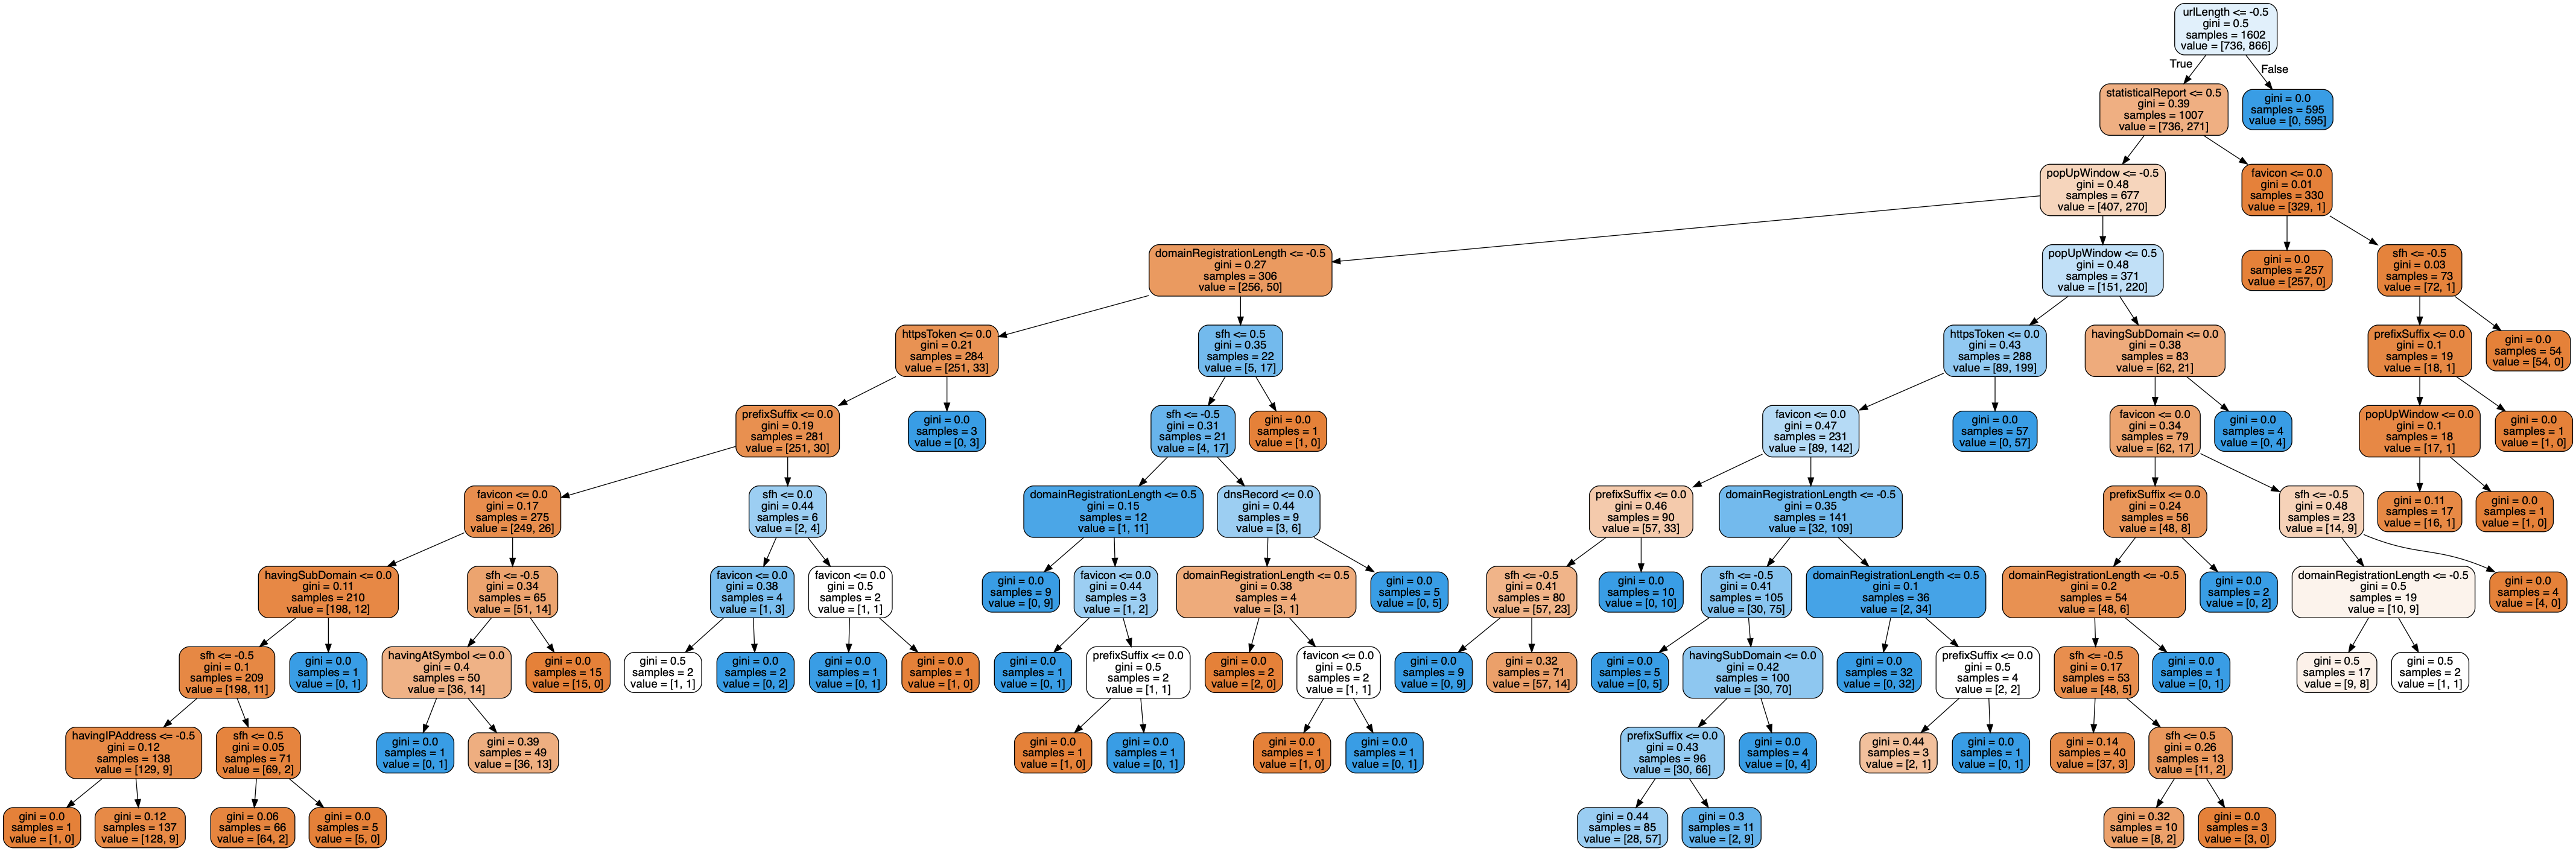

In [11]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

In [14]:
phishtank = pd.read_csv('phishtank262019.csv')
phishtank.info()
listphish = phishtank['url']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12213 entries, 0 to 12212
Data columns (total 8 columns):
phish_id             12213 non-null int64
url                  12213 non-null object
phish_detail_url     12213 non-null object
submission_time      12213 non-null object
verified             12213 non-null object
verification_time    12213 non-null object
online               12213 non-null object
target               12213 non-null object
dtypes: int64(1), object(7)
memory usage: 763.4+ KB


In [17]:

with open('phishtank_urls.txt', 'w+') as p:
    for item in listphish:
        p.write(item + '\n')

In [18]:
print(len(listphish))

12213
